In [1]:
# Copy to top of each NB.ipynb to load all config files
import os
import glob

project_name = 'Project_Planning_Assistant'
config_dir = f'C:/Users/delst/OneDrive/Desktop/Code/Workspace/{project_name}/A_Root_Dir/Configurations'

txt_files = glob.glob(os.path.join(config_dir, '*.txt'))

for file_path in txt_files:
    with open(file_path, 'r') as file:
        content = file.read()
        exec(content)

start_time = datetime.datetime.now().replace(microsecond=0)

---

In [2]:
import pandas as pd
import numpy as np
from random import randint
from datetime import timedelta, datetime

# Define the tasks
stage_list = [
    'Stage_1_Metadata', 
    'Stage_2_Initial_Processing', 
    'Stage_3_Initial_Exploration',
    'Stage_4_Preprocessing', 
    'Stage_5_Feature_Engineering',
    'Stage_6_Data_Validation', 
    'Stage_7_Model_Selection', 
    'Stage_8_Model_Training',
    'Stage_9_Model_Validation', 
    'Stage_10_Hyperparameter_Tuning', 
    'Stage_11_Model_Evaluation',
    'Stage_12_Model_Deployment', 
    'Stage_13_Model_Optimization', 
    'Stage_14_Maintenance',
    'Stage_15_Review',
    'Stage_16_Unknown',
    'Stage_17_Unknown',
    'Stage_18_Unknown',
]

# Function to generate random dates
def random_dates(start, end, n=10):
    start_u = start.value//10**9
    end_u = end.value//10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

# Define start and end for date generation
start = pd.to_datetime('2023-01-01')
end = pd.to_datetime('2023-12-31')

df = pd.DataFrame({
    'Stage': stage_list,
    'start_date': random_dates(start, end, 18),
})

df['end_date'] = df['start_date'] + pd.to_timedelta([timedelta(days=randint(1,30)) for _ in range(18)])

df['completion'] = [round(randint(1, 10) * 0.1, 1) for _ in range(18)]
df['starting_hour'] = df['start_date'].dt.hour
df['ending_hour'] = df['end_date'].dt.hour
df['total_hours_spent'] = df['ending_hour'] - df['starting_hour']

df


,Stage,start_date,end_date,completion,starting_hour,ending_hour,total_hours_spent
0,Stage_1_Metadata,2023-06-30 06:35:35,2023-07-06 06:35:35,0.6,6,6,0
1,Stage_2_Initial_Processing,2023-11-22 13:48:43,2023-12-14 13:48:43,0.5,13,13,0
2,Stage_3_Initial_Exploration,2023-03-12 02:10:42,2023-03-20 02:10:42,0.9,2,2,0
3,Stage_4_Preprocessing,2023-01-13 12:05:31,2023-01-26 12:05:31,0.8,12,12,0
4,Stage_5_Feature_Engineering,2023-03-21 20:00:43,2023-03-22 20:00:43,0.2,20,20,0
5,Stage_6_Data_Validation,2023-03-27 21:08:37,2023-04-14 21:08:37,0.2,21,21,0
6,Stage_7_Model_Selection,2023-03-12 18:59:21,2023-04-11 18:59:21,0.2,18,18,0
7,Stage_8_Model_Training,2023-10-05 10:00:11,2023-10-28 10:00:11,0.2,10,10,0
8,Stage_9_Model_Validation,2023-03-22 08:07:47,2023-03-28 08:07:47,0.3,8,8,0
9,Stage_10_Hyperparameter_Tuning,2023-12-03 08:41:45,2023-12-19 08:41:45,0.1,8,8,0


NameError: name 'Patch' is not defined

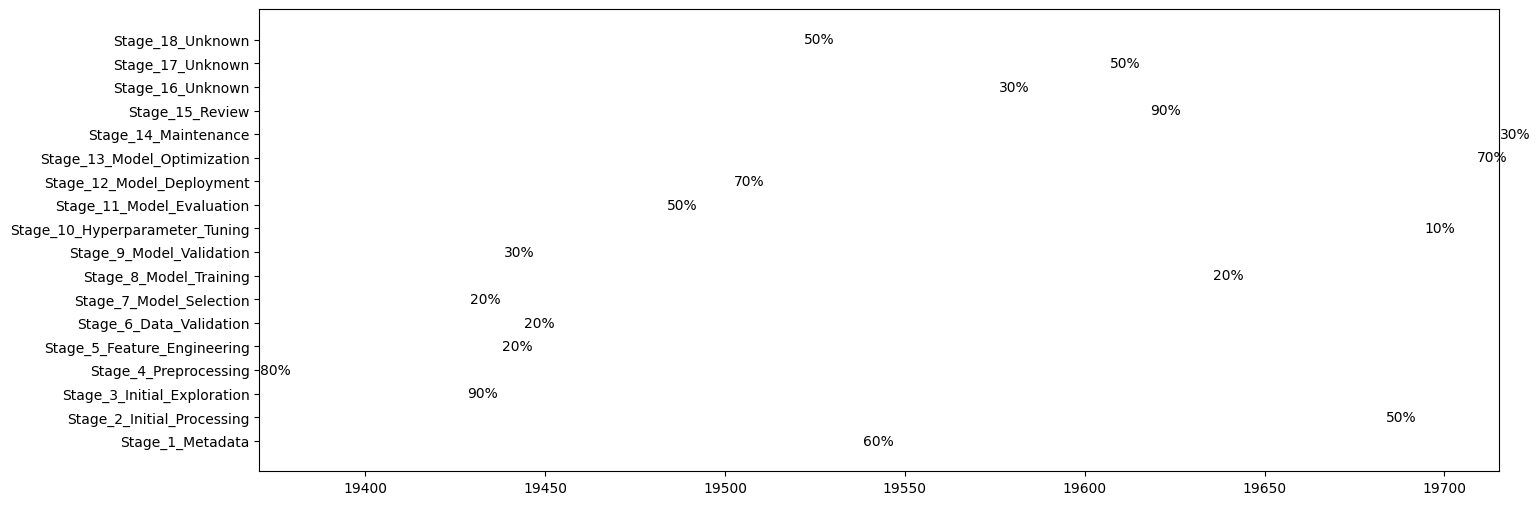

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(1, figsize=(16,6))

# bars
ax.barh(df.Stage, df.total_hours_spent, left=df.start_date, color='cyan', alpha=0.7)

# texts
for idx, row in df.iterrows():
    ax.text(row.start_date + pd.to_timedelta(row.total_hours_spent, unit='h') + pd.to_timedelta(5, unit='h'), 
            idx, 
            f"{int(row.completion*100)}%", 
            va='center')

##### LEGENDS #####
c_dict = {'Stage':'cyan'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements, loc='upper right')

##### TICKS #####
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.grid(visible=True)
plt.title('Gantt Chart')
plt.xlabel('Time')
plt.ylabel('Stages')

plt.show()


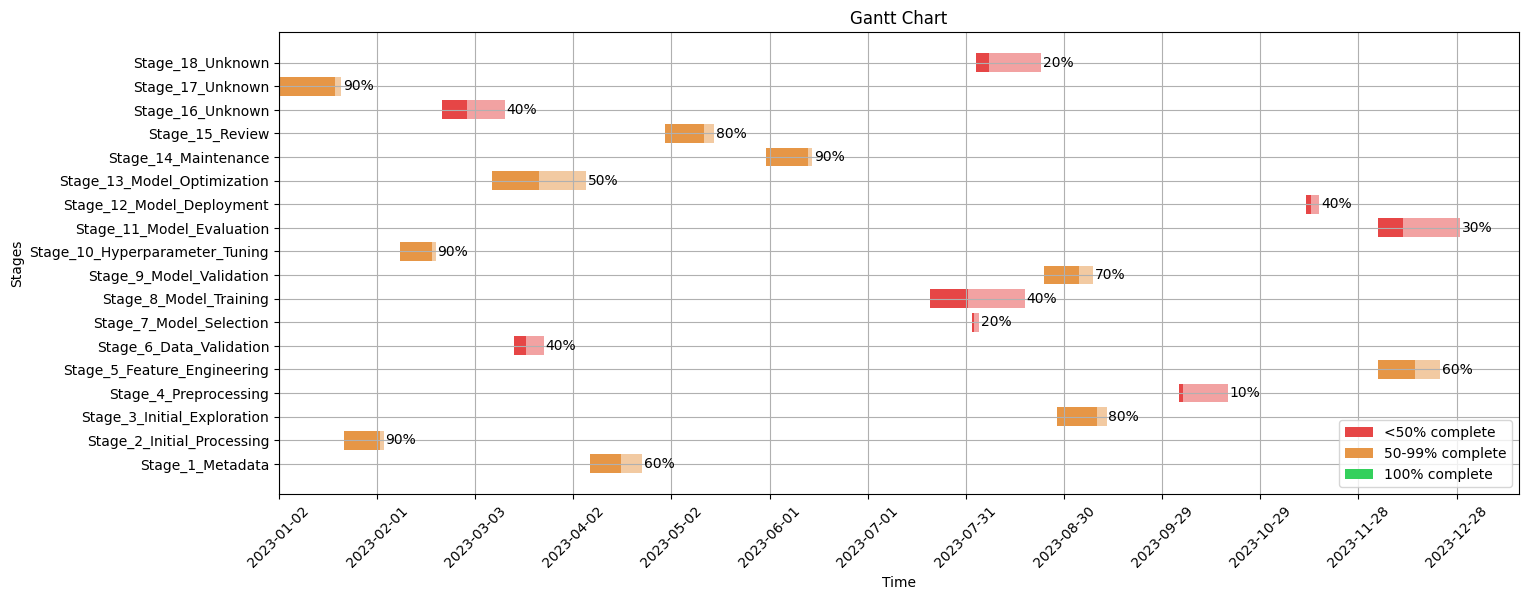

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Convert start_date and end_date to a number (of days since some point)
df['start_num'] = (df['start_date'] - df['start_date'].min()).dt.days
df['end_num'] = (df['end_date'] - df['start_date'].min()).dt.days
df['days_start_to_end'] = df['end_num'] - df['start_num']

# Calculate the current progress
df['current_num'] = df['days_start_to_end'] * df['completion']

# Color based on completion
def color(row):
    if row['completion'] < 0.5:
        return '#E64646'  # Red, less than 50% complete
    elif row['completion'] < 1.0:
        return '#E69646'  # Orange, 50-99% complete
    else:
        return '#34D05C'  # Green, 100% complete
df['color'] = df.apply(color, axis=1)

fig, ax = plt.subplots(1, figsize=(16,6))

# Plot the bars for the total task durations
ax.barh(df.Stage, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

# Plot the bars for the completed task durations
ax.barh(df.Stage, df.current_num, left=df.start_num, color=df.color)

# Add the completion percentages as text
for idx, row in df.iterrows():
    ax.text(row.end_num+0.5, idx, f"{int(row.completion*100)}%", va='center')

# Add a legend
c_dict = {'<50% complete':'#E64646', '50-99% complete':'#E69646', '100% complete':'#34D05C'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements, loc='lower right')

# Add x-axis labels every 30 days
xticks = np.arange(0, df.end_num.max()+1, 30)
xticks_labels = pd.date_range(df.start_date.min(), periods=len(xticks), freq='30D').strftime("%Y-%m-%d")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, rotation=45)

plt.grid(visible=True)
plt.title('Gantt Chart')
plt.xlabel('Time')
plt.ylabel('Stages')

plt.show()


---

In [ ]:
import pandas as pd
import numpy as np
from random import randint
from datetime import timedelta, datetime

# Define the tasks
stage_list = [
    '1_Metadata', 
    '2_Initial_Processing', 
    '3_Initial_Exploration',
    '4_Preprocessing', 
    '5_Feature_Engineering',
    '6_Data_Validation', 
    '7_Model_Selection', 
    '8_Model_Training',
    '9_Model_Validation', 
    '10_Hyperparameter_Tuning', 
    '11_Model_Evaluation',
    '12_Model_Deployment', 
    '13_Model_Optimization', 
    '14_Maintenance',
    '15_Review',
    '16_Unknown',
    '17_Unknown',
    '18_Unknown',
]

# Function to generate random dates
def random_dates(start, end, n=10):
    start_u = start.value//10**9
    end_u = end.value//10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

# Define start and end for date generation
start = pd.to_datetime('2023-01-01')
end = pd.to_datetime('2023-12-31')

df = pd.DataFrame({
    'Stage': stage_list,
    'start_date': random_dates(start, end, 18),
})

df['end_date'] = df['start_date'] + pd.to_timedelta([timedelta(days=randint(1,30)) for _ in range(18)])

df['completion'] = [round(randint(1, 10) * 0.1, 1) for _ in range(18)]
df['starting_hour'] = df['start_date'].dt.hour
df['ending_hour'] = df['end_date'].dt.hour
df['total_hours_spent'] = df['ending_hour'] - df['starting_hour']

df


,Stage,start_date,end_date,completion,starting_hour,ending_hour,total_hours_spent
0,1_Metadata,2023-06-30 22:21:28,2023-07-24 22:21:28,0.5,22,22,0
1,2_Initial_Processing,2023-12-17 17:12:36,2024-01-09 17:12:36,1.0,17,17,0
2,3_Initial_Exploration,2023-10-03 02:22:20,2023-11-01 02:22:20,0.2,2,2,0
3,4_Preprocessing,2023-10-21 23:15:21,2023-10-31 23:15:21,1.0,23,23,0
4,5_Feature_Engineering,2023-12-26 19:47:08,2024-01-19 19:47:08,0.9,19,19,0
5,6_Data_Validation,2023-08-30 11:00:48,2023-09-22 11:00:48,0.4,11,11,0
6,7_Model_Selection,2023-04-08 12:22:44,2023-05-05 12:22:44,0.9,12,12,0
7,8_Model_Training,2023-09-07 13:08:23,2023-09-11 13:08:23,0.5,13,13,0
8,9_Model_Validation,2023-11-04 11:35:50,2023-11-15 11:35:50,1.0,11,11,0
9,10_Hyperparameter_Tuning,2023-04-04 08:15:46,2023-04-24 08:15:46,0.9,8,8,0


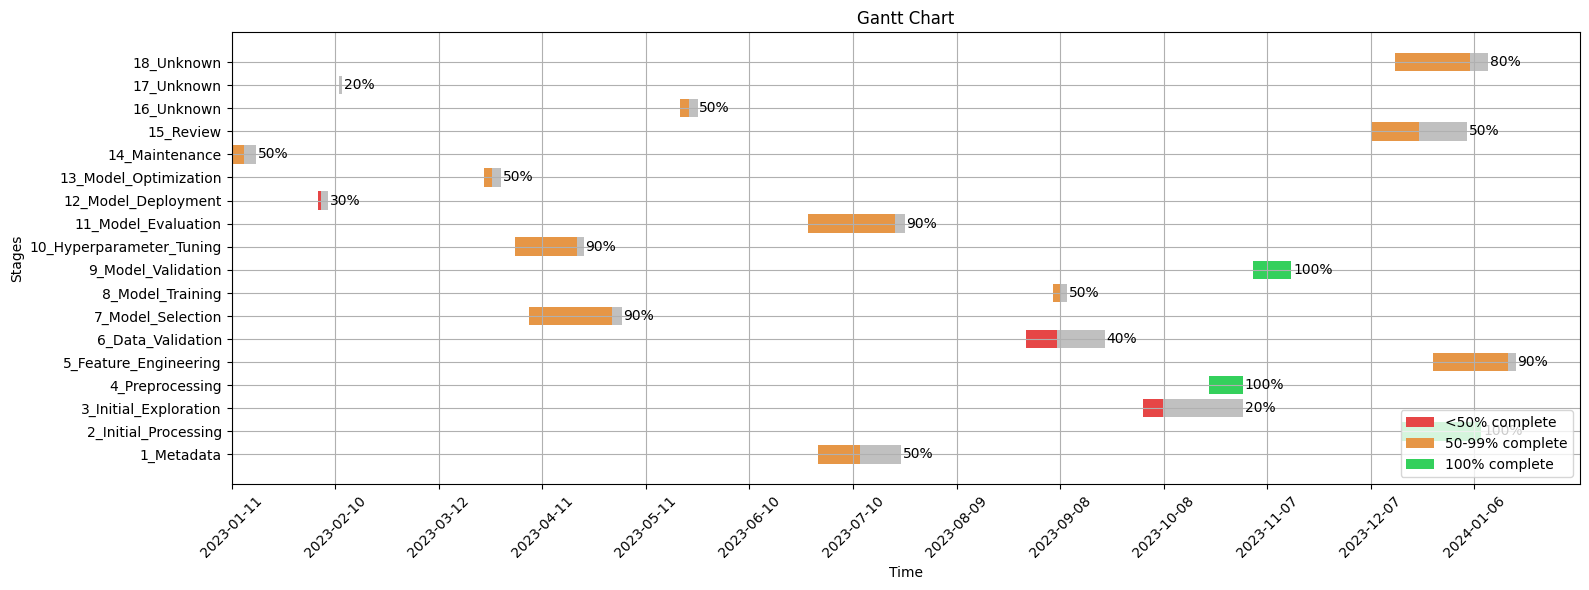

In [ ]:
# Convert start_date and end_date to a number (of days since some point)
df['start_num'] = (df['start_date'] - df['start_date'].min()).dt.days
df['end_num'] = (df['end_date'] - df['start_date'].min()).dt.days
df['days_start_to_end'] = df['end_num'] - df['start_num']

# Calculate the current progress
df['current_num'] = df['days_start_to_end'] * df['completion']

# Assign color based on completion
df['color'] = df.apply(color, axis=1)






import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Calculate current_num which is current progress in days
df['current_num'] = df['days_start_to_end'] * df['completion']

# Assign color based on completion
def color(row):
    if row['completion'] < 0.5:
        return '#E64646'  # Red, less than 50% complete
    elif row['completion'] < 1.0:
        return '#E69646'  # Orange, 50-99% complete
    else:
        return '#34D05C'  # Green, 100% complete
df['color'] = df.apply(color, axis=1)

fig, ax = plt.subplots(1, figsize=(16,6))

# Plot the bars for the total task durations
ax.barh(df.Stage, df.days_start_to_end, left=df.start_num, color='silver', label='Planned Duration')

# Plot the bars for the completed task durations
ax.barh(df.Stage, df.current_num, left=df.start_num, color=df.color, label='Actual Duration')

# Add the completion percentages as text
for idx, row in df.iterrows():
    ax.text(row.end_num+0.5, idx, f"{int(row.completion*100)}%", va='center')

# Add a legend
c_dict = {'<50% complete':'#E64646', '50-99% complete':'#E69646', '100% complete':'#34D05C'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements, loc='lower right')

# Add x-axis labels every 30 days
xticks = np.arange(0, df.end_num.max()+1, 30)
xticks_labels = pd.date_range(df.start_date.min(), periods=len(xticks), freq='30D').strftime("%Y-%m-%d")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, rotation=45)

plt.grid(visible=True)
plt.title('Gantt Chart')
plt.xlabel('Time')
plt.ylabel('Stages')

plt.tight_layout()
plt.show()


In [ ]:
def enter_hours(stage):
    start_hour = input(f"Enter start hour for {stage}: ")
    end_hour = input(f"Enter end hour for {stage}: ")
    # Convert to integers and calculate total hours
    start_hour = int(start_hour)
    end_hour = int(end_hour)
    total_hours = end_hour - start_hour
    return start_hour, end_hour, total_hours


In [ ]:
enter_hours('1_Metadata')

(3, 7, 4)

In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

stages = [
    'Metadata', 'Initial_Processing', 'Initial_Exploration',
    'Preprocessing', 'Feature_Engineering', 'Data_Validation',
    'Model_Selection', 'Model_Training', 'Model_Validation',
    'Hyperparameter_Tuning', 'Model_Evaluation', 'Model_Deployment',
    'Model_Optimization', 'Pipeline_Maintenance', 'Data_Review'
]

# Define start and end times (9AM to 5PM)
start_time = 9
end_time = 17

# Generate start dates
start_dates = [datetime.today()]
for _ in range(len(stages)-1):
    start_dates.append(start_dates[-1] + timedelta(days=random.randint(1,5)))

# Generate end dates based on start dates
end_dates = [start_date + timedelta(hours=end_time-start_time) for start_date in start_dates]

df = pd.DataFrame({
    'Stage': stages,
    'start_date': start_dates,
    'end_date': end_dates,
    'completion': np.round(np.random.uniform(0.1, 1.0, len(stages)), 2),
    'starting_hour': start_time,
    'ending_hour': end_time
})

# Compute total hours spent per stage
df['total_hours_spent'] = df['ending_hour'] - df['starting_hour']

# Convert start_date and end_date to a number (of days since some point)
df['start_num'] = (df['start_date'] - df['start_date'].min()).dt.days
df['end_num'] = (df['end_date'] - df['start_date'].min()).dt.days
df['days_start_to_end'] = df['end_num'] - df['start_num']

# Calculate the current progress
df['current_num'] = df['days_start_to_end'] * df['completion']

# Assign color based on completion
df['color'] = df.apply(color, axis=1)

df


,Stage,start_date,end_date,completion,starting_hour,ending_hour,total_hours_spent,start_num,end_num,days_start_to_end,current_num,color
0,Metadata,2023-05-19 19:06:02.415490,2023-05-20 03:06:02.415490,0.13,9,17,8,0,0,0,0.0,#E64646
1,Initial_Processing,2023-05-23 19:06:02.415490,2023-05-24 03:06:02.415490,0.34,9,17,8,4,4,0,0.0,#E64646
2,Initial_Exploration,2023-05-25 19:06:02.415490,2023-05-26 03:06:02.415490,0.64,9,17,8,6,6,0,0.0,#E69646
3,Preprocessing,2023-05-28 19:06:02.415490,2023-05-29 03:06:02.415490,0.37,9,17,8,9,9,0,0.0,#E64646
4,Feature_Engineering,2023-06-01 19:06:02.415490,2023-06-02 03:06:02.415490,0.87,9,17,8,13,13,0,0.0,#E69646
5,Data_Validation,2023-06-03 19:06:02.415490,2023-06-04 03:06:02.415490,0.86,9,17,8,15,15,0,0.0,#E69646
6,Model_Selection,2023-06-04 19:06:02.415490,2023-06-05 03:06:02.415490,0.24,9,17,8,16,16,0,0.0,#E64646
7,Model_Training,2023-06-09 19:06:02.415490,2023-06-10 03:06:02.415490,0.34,9,17,8,21,21,0,0.0,#E64646
8,Model_Validation,2023-06-12 19:06:02.415490,2023-06-13 03:06:02.415490,0.99,9,17,8,24,24,0,0.0,#E69646
9,Hyperparameter_Tuning,2023-06-13 19:06:02.415490,2023-06-14 03:06:02.415490,0.49,9,17,8,25,25,0,0.0,#E64646


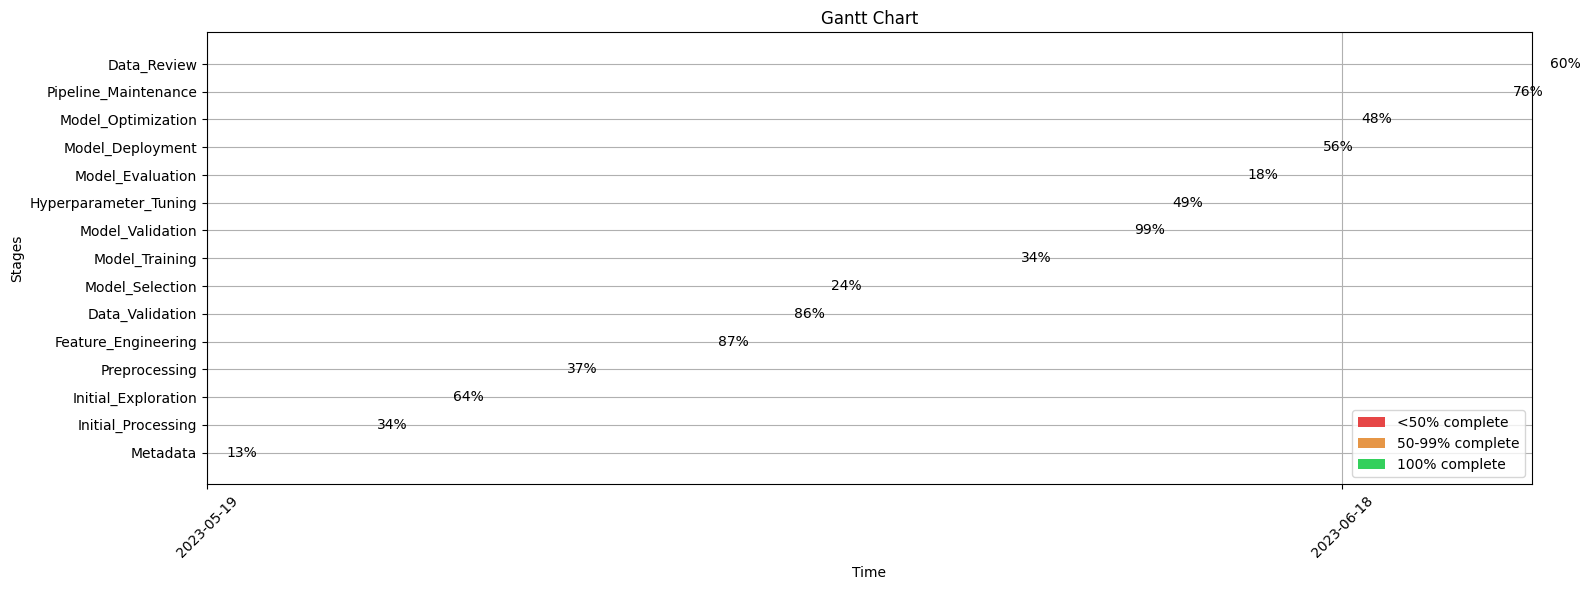

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,6))

# Plot the bars for the total task durations
ax.barh(df.Stage, df.days_start_to_end, left=df.start_num, color='silver', label='Planned Duration')

# Plot the bars for the completed task durations
ax.barh(df.Stage, df.current_num, left=df.start_num, color=df.color, label='Actual Duration')

# Add the completion percentages as text
for idx, row in df.iterrows():
    ax.text(row.end_num+0.5, idx, f"{int(row.completion*100)}%", va='center')

# Add a legend
c_dict = {'<50% complete':'#E64646', '50-99% complete':'#E69646', '100% complete':'#34D05C'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements, loc='lower right')

# Add x-axis labels every 30 days
xticks = np.arange(0, df.end_num.max()+1, 30)
xticks_labels = pd.date_range(df.start_date.min(), periods=len(xticks), freq='30D').strftime("%Y-%m-%d")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, rotation=45)

plt.grid(visible=True)
plt.title('Gantt Chart')
plt.xlabel('Time')
plt.ylabel('Stages')

plt.tight_layout()
plt.show()


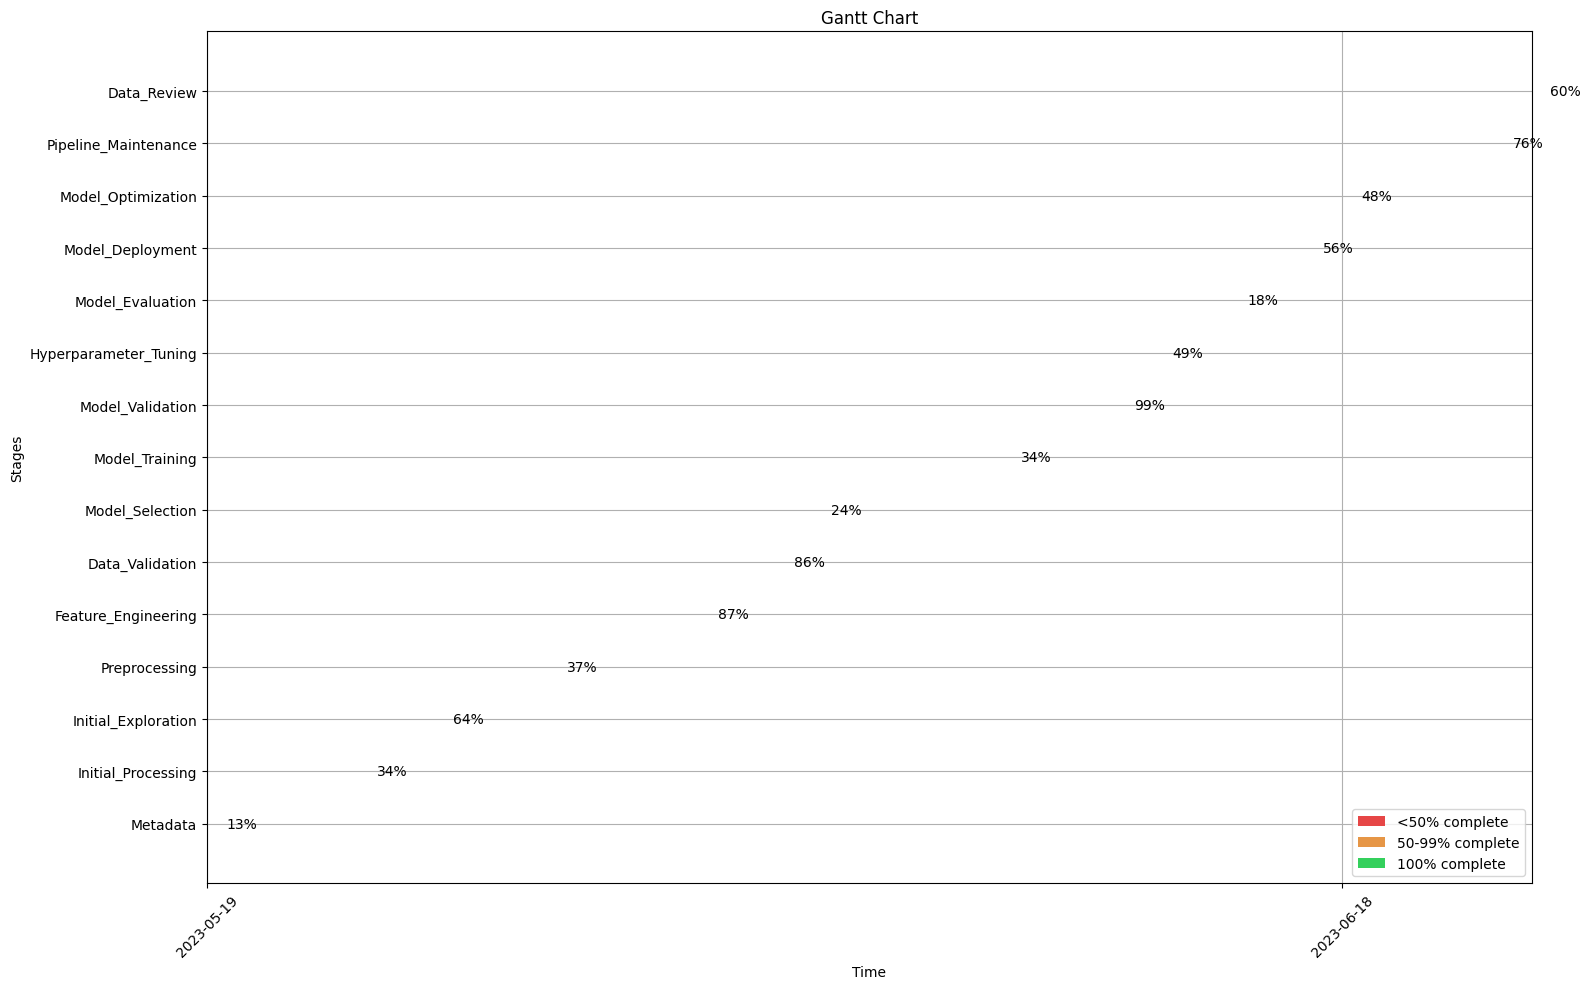

In [ ]:
# Sort the tasks by start date
df = df.sort_values(by='start_date')

fig, ax = plt.subplots(1, figsize=(16,10))

# Plot the bars for the total task durations
ax.barh(df.Stage, df.days_start_to_end, left=df.start_num, color='silver', label='Planned Duration')

# Plot the bars for the completed task durations
ax.barh(df.Stage, df.current_num, left=df.start_num, color=df.color, label='Actual Duration')

# Add the completion percentages as text
for idx, row in df.iterrows():
    ax.text(row.end_num+0.5, idx, f"{int(row.completion*100)}%", va='center')

# Add a legend
c_dict = {'<50% complete':'#E64646', '50-99% complete':'#E69646', '100% complete':'#34D05C'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements, loc='lower right')

# Add x-axis labels every 30 days
xticks = np.arange(0, df.end_num.max()+1, 30)
xticks_labels = pd.date_range(df.start_date.min(), periods=len(xticks), freq='30D').strftime("%Y-%m-%d")
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_labels, rotation=45)

plt.grid(visible=True)
plt.title('Gantt Chart')
plt.xlabel('Time')
plt.ylabel('Stages')

plt.tight_layout()
plt.show()


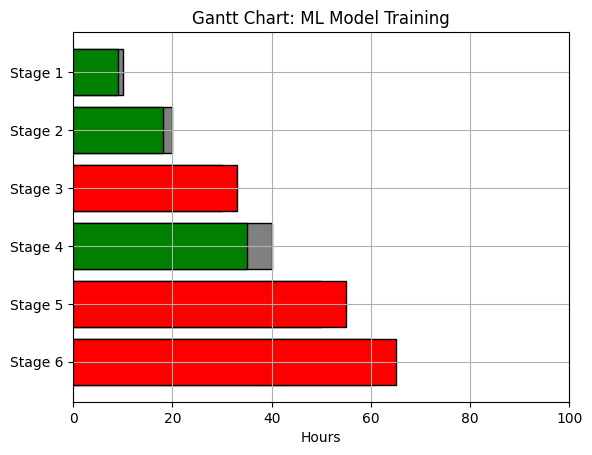

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define stages and estimated/actual times
stages = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5', 'Stage 6']
estimated_hours = [10, 20, 30, 40, 50, 60]  # Placeholder estimated hours
actual_hours = [9, 18, 33, 35, 55, 65]  # Placeholder actual hours

y_pos = np.arange(len(stages))

# Create a figure and axis
fig, ax = plt.subplots()

# Create grey bars for estimated hours
ax.barh(y_pos, estimated_hours, align='center', color='grey', edgecolor='black')

# Create green/red bars for actual hours
colors = ['green' if actual <= estimated else 'red' for actual, estimated in zip(actual_hours, estimated_hours)]
ax.barh(y_pos, actual_hours, align='center', color=colors, edgecolor='black')

# Labeling and aesthetics
ax.set_yticks(y_pos)
ax.set_yticklabels(stages)
ax.invert_yaxis()
ax.set_xlabel('Hours')
ax.set_title('Gantt Chart: ML Model Training')
plt.xlim(0, 100)
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import plotly.figure_factory as ff
import pandas as pd

def create_gantt_chart(df):
    """
    df: DataFrame containing task information. Expected columns:
        Stage, start_date, end_date, completion, starting_hour, ending_hour, total_hours_spent
    Returns a Plotly Gantt chart
    """
    df['Task'] = df['Stage']
    df['Start'] = pd.to_datetime(df['start_date']) + pd.to_timedelta(df['starting_hour'], unit='h')
    df['Finish'] = pd.to_datetime(df['end_date']) + pd.to_timedelta(df['ending_hour'], unit='h')
    df['Resource'] = df['Task']  # using Task as Resource for color coding
    df['Completion'] = df['completion']
    
    fig = ff.create_gantt(df, colors='Viridis', index_col='Resource',
                          show_colorbar=True, group_tasks=True,
                          showgrid_x=True, showgrid_y=True,
                          title='Gantt Chart')
    return fig


In [ ]:
import plotly.figure_factory as ff
import pandas as pd

def create_gantt_chart(df):
    """
    df: DataFrame containing task information. Expected columns:
        Stage, start_date, end_date, completion, starting_hour, ending_hour, total_hours_spent
    Returns a Plotly Gantt chart
    """
    df['Task'] = df['Stage']
    df['Start'] = pd.to_datetime(df['start_date']) + pd.to_timedelta(df['starting_hour'], unit='h')
    df['Finish'] = pd.to_datetime(df['end_date']) + pd.to_timedelta(df['ending_hour'], unit='h')
    df['Resource'] = df['Task']  # using Task as Resource for color coding
    df['Completion'] = df['completion']
    
    fig = ff.create_gantt(df, colors='Viridis', index_col='Resource',
                          show_colorbar=True, group_tasks=True,
                          showgrid_x=True, showgrid_y=True,
                          title='Gantt Chart')
    return fig


In [ ]:
df = pd.DataFrame({
    'Stage': ['Task 1', 'Task 2', 'Task 3'],
    'start_date': ['2023-05-01', '2023-05-02', '2023-05-03'],
    'end_date': ['2023-05-05', '2023-05-06', '2023-05-07'],
    'completion': [100, 75, 50],
    'starting_hour': [8, 9, 10],
    'ending_hour': [17, 18, 19],
    'total_hours_spent': [9, 9, 9]
})

fig = create_gantt_chart(df)
fig.show()


PlotlyError: Error. The number of colors in 'colors' must be no less than the number of unique index values in your group column.

In [ ]:
import plotly.figure_factory as ff
import pandas as pd

def create_gantt_chart(df):
    """
    df: DataFrame containing task information. Expected columns:
        Stage, start_date, end_date, completion, starting_hour, ending_hour, total_hours_spent
    Returns a Plotly Gantt chart
    """
    df['Task'] = df['Stage']
    df['Start'] = pd.to_datetime(df['start_date'])
    df['Finish'] = pd.to_datetime(df['end_date'])
    df['Resource'] = df['Task']  # using Task as Resource for color coding
    df['Completion'] = df['completion']
    
    fig = ff.create_gantt(df, colors='Viridis', index_col='Resource',
                          show_colorbar=True, group_tasks=True,
                          showgrid_x=True, showgrid_y=True,
                          title='Gantt Chart')
    return fig

fig = create_gantt_chart(df)
fig.show()




PlotlyError: Error. The number of colors in 'colors' must be no less than the number of unique index values in your group column.

In [ ]:
class Task:
    def __init__(self, title, description):
        self.title = title
        self.description = description
        self.status = "To Do"
        
    def move_to_in_progress(self):
        self.status = "In Progress"
    
    def move_to_done(self):
        self.status = "Done"

    def __str__(self):
        return f'Title: {self.title}\nDescription: {self.description}\nStatus: {self.status}\n'

class Board:
    def __init__(self):
        self.tasks = []

    def add_task(self, title, description):
        task = Task(title, description)
        self.tasks.append(task)

    def show_tasks(self):
        for task in self.tasks:
            print(task)

    def move_to_in_progress(self, task_title):
        for task in self.tasks:
            if task.title == task_title:
                task.move_to_in_progress()

    def move_to_done(self, task_title):
        for task in self.tasks:
            if task.title == task_title:
                task.move_to_done()


# Sample usage
board = Board()
board.add_task("Write Report", "Write end-of-month report")
board.add_task("Review Budget", "Review budget for next quarter")

board.show_tasks()

board.move_to_in_progress("Write Report")
board.move_to_done("Review Budget")

board.show_tasks()


Title: Write Report
Description: Write end-of-month report
Status: To Do

Title: Review Budget
Description: Review budget for next quarter
Status: To Do

Title: Write Report
Description: Write end-of-month report
Status: In Progress

Title: Review Budget
Description: Review budget for next quarter
Status: Done



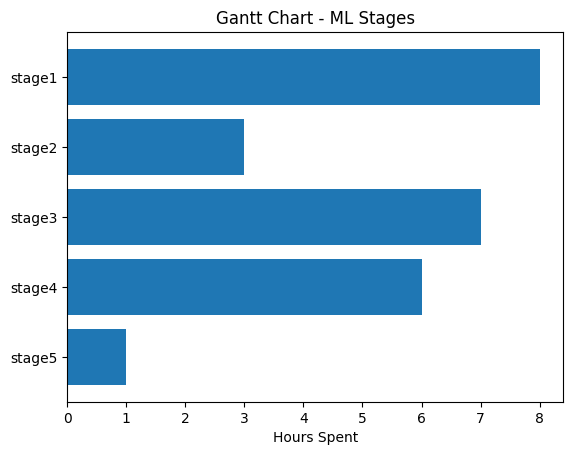

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class GanttChart:
    def __init__(self, stages, hours):
        self.stages = stages
        self.hours = hours
        self.labels = ['stage'+str(i) for i in stages]
        
    def generate_chart(self):
        y_pos = np.arange(len(self.labels))
        fig, ax = plt.subplots()

        ax.barh(y_pos, self.hours, align='center')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(self.labels)
        ax.invert_yaxis()
        ax.set_xlabel('Hours Spent')
        ax.set_title('Gantt Chart - ML Stages')

        plt.show()

# Usage:
stages = np.arange(1, 6)  # for 5 stages
hours = np.random.randint(1, 10, size=len(stages))  # Random hours for example

gantt = GanttChart(stages, hours)
gantt.generate_chart()


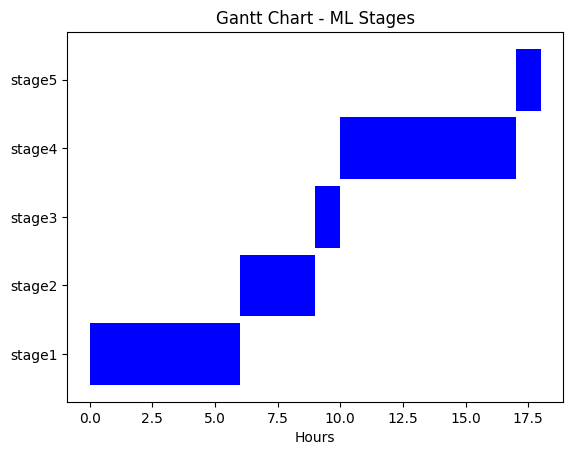

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class GanttChart:
    def __init__(self, stages, hours):
        self.stages = stages
        self.hours = hours
        self.labels = ['stage'+str(i) for i in stages]

    def generate_chart(self):
        fig, ax = plt.subplots()
        yticks = []
        height = 9

        start = 0
        for i, (stage, duration) in enumerate(zip(self.stages, self.hours)):
            ax.broken_barh([(start, duration)], (i*10, height), facecolors='blue')
            start += duration
            yticks.append(i*10 + height/2)

        ax.set_yticks(yticks)
        ax.set_yticklabels(self.labels)
        ax.set_xlabel('Hours')
        ax.set_title('Gantt Chart - ML Stages')

        plt.show()

# Usage:
stages = np.arange(1, 6)  # for 5 stages
hours = np.random.randint(1, 10, size=len(stages))  # Random hours for example

gantt = GanttChart(stages, hours)
gantt.generate_chart()
